Demo用Deep Neural Network对MINST实现Classification

In [2]:
import warnings
warnings.filterwarnings("ignore")
# 读取数据
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("D:\\Document\\05_Python\\Jupyter\\dataset\\MNIST", one_hot=True)
train_images = mnist.train.images
train_labels = mnist.train.labels
test_images  = mnist.test.images
test_labels  = mnist.test.labels
print("Load Data Done")
print("train images shape:",train_images.shape)
print("train labels shape:",train_labels.shape)
print("test images shape:", test_images.shape)
print("test labels shape:", test_labels.shape)

Extracting D:\Document\05_Python\Jupyter\dataset\MNIST\train-images-idx3-ubyte.gz
Extracting D:\Document\05_Python\Jupyter\dataset\MNIST\train-labels-idx1-ubyte.gz
Extracting D:\Document\05_Python\Jupyter\dataset\MNIST\t10k-images-idx3-ubyte.gz
Extracting D:\Document\05_Python\Jupyter\dataset\MNIST\t10k-labels-idx1-ubyte.gz
Load Data Done
train images shape: (55000, 784)
train labels shape: (55000, 10)
test images shape: (10000, 784)
test labels shape: (10000, 10)


In [10]:
# 使用keras构建DNN
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, activations
# 使用Sequential model
dnn_model = Sequential()
dnn_model.add(Dense(64, activation=activations.relu, input_dim=784))
dnn_model.add(Dense(32, activation=activations.relu))
dnn_model.add(Dense(10, activation=activations.softmax))
dnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [11]:
# define the compile and train DNN model
dnn_model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
train_history = dnn_model.fit(x=train_images,
                              y=train_labels,
                              batch_size=200,
                              epochs=20,
                              validation_data=(test_images, test_labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/20
55000/55000 [==============================] - 1s 16us/step - loss: 1.7543 - acc: 0.5114 - val_loss: 1.1972 - val_acc: 0.6998
Epoch 2/20
55000/55000 [==============================] - 1s 13us/step - loss: 0.9171 - acc: 0.7612 - val_loss: 0.6899 - val_acc: 0.8193
Epoch 3/20
55000/55000 [==============================] - 1s 14us/step - loss: 0.6051 - acc: 0.8415 - val_loss: 0.5082 - val_acc: 0.8605
Epoch 4/20
55000/55000 [==============================] - 1s 13us/step - loss: 0.4809 - acc: 0.8695 - val_loss: 0.4283 - val_acc: 0.8815
Epoch 5/20
55000/55000 [==============================] - 1s 12us/step - loss: 0.4197 - acc: 0.8842 - val_loss: 0.3803 - val_acc: 0.8943
Epoch 6/20
55000/55000 [==============================] - 1s 12us/step - loss: 0.3824 - acc: 0.8930 - val_loss: 0.3511 - val_acc: 0.9009
Epoch 7/20
55000/55000 [==============================] - 1s 12us/step - loss: 0.3564 - acc: 0.9000 - val_loss: 0.3302 - val_acc

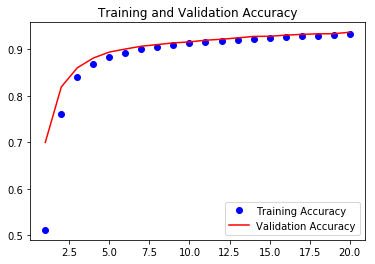

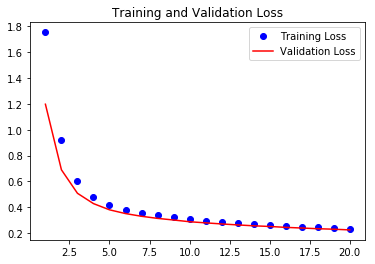

In [14]:
# training visulization
import matplotlib.pyplot as plt

train_acc = train_history.history['acc']
test_acc  = train_history.history['val_acc']
train_loss = train_history.history['loss']
test_loss  = train_history.history['val_loss']
epochs = range(1, len(train_acc)+1)

plt.figure()
plt.plot(epochs, train_acc, 'bo', label="Training Accuracy")
plt.plot(epochs, test_acc, 'r', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, train_loss, 'bo', label="Training Loss")
plt.plot(epochs, test_loss, 'r', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend()

plt.show()